In [3]:
import sklearn
sklearn.__version__

'1.5.1'

# 1. linear Regression
### 공부 시간에 따른 시험 점수

In [9]:
import matplotlib.pyplot as plt
import pandas as pd

In [21]:
dataset = pd.read_csv('/Users/jaeeunpark/Downloads/PythonMLWorkspace(LightWeight)/ScikitLearn/LinearRegressionData.csv')

In [23]:
dataset.head()

,hour,score
0,0.5,10
1,1.2,8
2,1.8,14
3,2.4,26
4,2.6,22


In [29]:
X = dataset.iloc[:,:-1].values #[row,column], :은 모든 데이터, :-1은 처음부터 마지막 컬럼 직전까지의 데이터 (독립변수)
y = dataset.iloc[:,-1].values #-1은 마지막 컬럼 데이터 (종속변수 - 결과)

In [31]:
X,y

(array([[ 0.5],
        [ 1.2],
        [ 1.8],
        [ 2.4],
        [ 2.6],
        [ 3.2],
        [ 3.9],
        [ 4.4],
        [ 4.5],
        [ 5. ],
        [ 5.3],
        [ 5.8],
        [ 6. ],
        [ 6.1],
        [ 6.2],
        [ 6.9],
        [ 7.2],
        [ 8.4],
        [ 8.6],
        [10. ]]),
 array([ 10,   8,  14,  26,  22,  30,  42,  48,  38,  58,  60,  72,  62,
         68,  72,  58,  76,  86,  90, 100]))

In [33]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression() #객체생성
reg.fit(X,y) #학습 (모델 생성)

LinearRegression()

In [35]:
y_pred = reg.predict(X) #X에 대한 예측값
y_pred

array([  5.00336377,  12.31395163,  18.58016979,  24.84638795,
        26.93512734,  33.20134551,  40.51193337,  45.73378184,
        46.77815153,  52.        ,  55.13310908,  60.35495755,
        62.44369694,  63.48806663,  64.53243633,  71.84302419,
        74.97613327,  87.5085696 ,  89.59730899, 104.2184847 ])

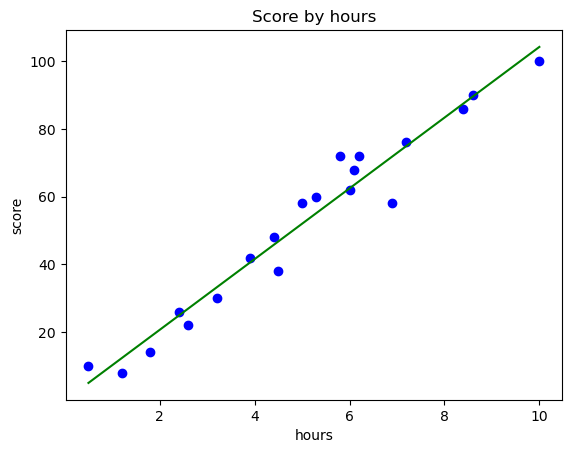

In [37]:
plt.scatter(X,y,color='b') #산점도 그래프
plt.plot(X,y_pred,color='g') #선 그래프
plt.title('Score by hours')
plt.xlabel('hours')
plt.ylabel('score')
plt.show()

In [43]:
print('9시간 공부했을 때 예상 점수: ',reg.predict([[9]])) #2차원 배열 형태로 들어가야함 ([[]])

9시간 공부했을 때 예상 점수:  [93.77478776]


In [45]:
reg.coef_ #기울기 (m)

array([10.44369694])

In [47]:
reg.intercept_ #y절편 (b)

-0.218484702867201

In [ ]:
y = mx + b -> y = 10.4436x - 0.2184

### 데이터 세트 분리

In [50]:
import matplotlib.pyplot as plt
import pandas as pd

In [54]:
dataset = pd.read_csv('/Users/jaeeunpark/Downloads/PythonMLWorkspace(LightWeight)/ScikitLearn/LinearRegressionData.csv')
dataset

,hour,score
0,0.5,10
1,1.2,8
2,1.8,14
3,2.4,26
4,2.6,22
5,3.2,30
6,3.9,42
7,4.4,48
8,4.5,38
9,5.0,58


In [56]:
X = dataset.iloc[:,:-1].values
y = dataset.iloc[:,-1].values

In [60]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0) #train 80 : test 20 으로 분리

In [62]:
X, len(X) #전체 데이터 X, 개수

(array([[ 0.5],
        [ 1.2],
        [ 1.8],
        [ 2.4],
        [ 2.6],
        [ 3.2],
        [ 3.9],
        [ 4.4],
        [ 4.5],
        [ 5. ],
        [ 5.3],
        [ 5.8],
        [ 6. ],
        [ 6.1],
        [ 6.2],
        [ 6.9],
        [ 7.2],
        [ 8.4],
        [ 8.6],
        [10. ]]),
 20)

In [66]:
X_train, len(X_train) #훈련 세트 X, 개수

(array([[5.3],
        [8.4],
        [3.9],
        [6.1],
        [2.6],
        [1.8],
        [3.2],
        [6.2],
        [5. ],
        [4.4],
        [7.2],
        [5.8],
        [2.4],
        [0.5],
        [6.9],
        [6. ]]),
 16)

In [68]:
X_test, len(X_test) #테스트 세트 X, 개수

(array([[ 8.6],
        [ 1.2],
        [10. ],
        [ 4.5]]),
 4)

In [70]:
y, len(y)

(array([ 10,   8,  14,  26,  22,  30,  42,  48,  38,  58,  60,  72,  62,
         68,  72,  58,  76,  86,  90, 100]),
 20)

In [72]:
y_train, len(y_train)

(array([60, 86, 42, 68, 22, 14, 30, 72, 58, 48, 76, 72, 26, 10, 58, 62]), 16)

In [74]:
y_test, len(y_test)

(array([ 90,   8, 100,  38]), 4)

### 분리된 데이터를 통한 모델링

In [77]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression()

In [79]:
reg.fit(X_train, y_train) #훈련 세트로 학습

LinearRegression()

### 데이터 시각화 (훈련 세트)

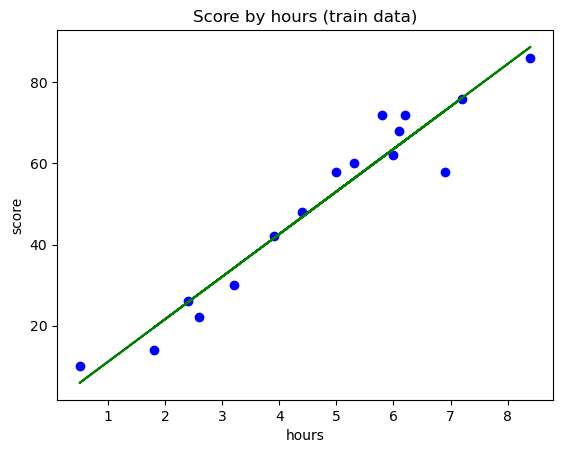

In [88]:
plt.scatter(X_train,y_train,color='b') #산점도 그래프
plt.plot(X_train,reg.predict(X_train),color='g') #선 그래프
plt.title('Score by hours (train data)')
plt.xlabel('hours')
plt.ylabel('score')
plt.show()

### 데이터 시각화 (테스트 세트)

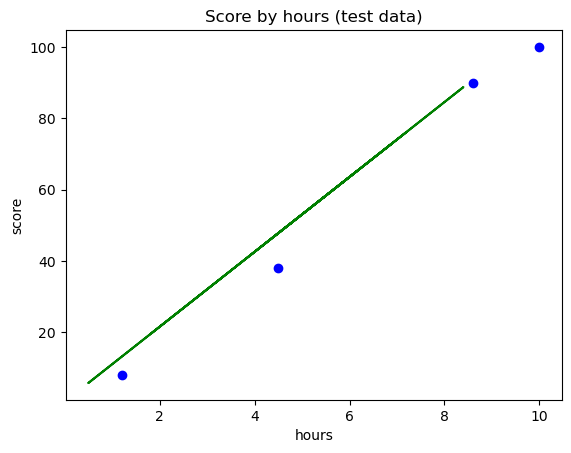

In [93]:
plt.scatter(X_test,y_test,color='b') #검증은 테스트 데이터로
plt.plot(X_train,reg.predict(X_train),color='g') #모델을 만들 때는 훈련세트 썼으므로 그대로
plt.title('Score by hours (test data)')
plt.xlabel('hours')
plt.ylabel('score')
plt.show()

In [95]:
reg.coef_

array([10.49161294])

In [97]:
reg.intercept_

0.6115562905169796

### 모델 평가

In [100]:
reg.score(X_test,y_test) #테스트 세트를 통한 모델 평가 #0은 0점, 1은 100점

0.9727616474310156

In [102]:
reg.score(X_train,y_train)

0.9356663661221668

## 경사 하강법 (Gradient Descent)

In [ ]:
#max_iter : 훈련 세트 반복 횟수 (Epoch 횟수)
#verbose: 훈련세트를 반복하면서 손실(loss)이 어떻게 줄어드는지 보여줌

In [147]:
from sklearn.linear_model import SGDRegressor #SGD : Stochastic Gradient Descent 확률적 경사 하강법
sr = SGDRegressor(max_iter=1000, eta0=0.01, random_state=0, verbose=1) #지수표기법: 1e-3: 0.001 (10^-3), 1e+3: 1000 (10^3)
sr.fit(X_train,y_train)

-- Epoch 1
Norm: 9.29, NNZs: 1, Bias: 1.896809, T: 16, Avg. loss: 273.972341
Total training time: 0.00 seconds.
-- Epoch 2
Norm: 10.22, NNZs: 1, Bias: 2.051952, T: 32, Avg. loss: 21.528918
Total training time: 0.00 seconds.
-- Epoch 3
Norm: 10.29, NNZs: 1, Bias: 2.048223, T: 48, Avg. loss: 19.357188
Total training time: 0.00 seconds.
-- Epoch 4
Norm: 10.18, NNZs: 1, Bias: 2.017074, T: 64, Avg. loss: 19.101267
Total training time: 0.00 seconds.
-- Epoch 5
Norm: 10.04, NNZs: 1, Bias: 1.980206, T: 80, Avg. loss: 18.424713
Total training time: 0.00 seconds.
-- Epoch 6
Norm: 10.19, NNZs: 1, Bias: 1.995352, T: 96, Avg. loss: 19.235589
Total training time: 0.00 seconds.
-- Epoch 7
Norm: 10.33, NNZs: 1, Bias: 2.005374, T: 112, Avg. loss: 18.213245
Total training time: 0.00 seconds.
-- Epoch 8
Norm: 10.19, NNZs: 1, Bias: 1.971733, T: 128, Avg. loss: 18.722017
Total training time: 0.00 seconds.
-- Epoch 9
Norm: 10.08, NNZs: 1, Bias: 1.941770, T: 144, Avg. loss: 18.247385
Total training time: 0.0

SGDRegressor(random_state=0, verbose=1)

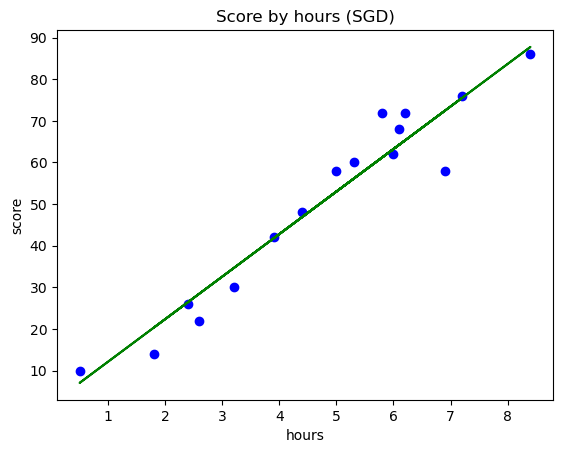

In [149]:
plt.scatter(X_train,y_train,color='b') #산점도 그래프
plt.plot(X_train,sr.predict(X_train),color='g') #선 그래프
plt.title('Score by hours (SGD)')
plt.xlabel('hours')
plt.ylabel('score')
plt.show()

In [113]:
sr.coef_

array([10.32539502])

In [115]:
sr.intercept_

array([1.56873404])

In [117]:
sr.score(X_test,y_test) #테스트 세트를 통한 모델 평가

0.9719270668995394

In [119]:
sr.score(X_train,y_train) #훈련 세트를 통한 모델 평가

0.9353757024241283